In [ ]:
# SALES PREDICTION USING PYTHON

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as m

In [ ]:
filepath = ("dataset/Advertising.csv")

In [71]:
df = pd.read_csv(filepath)


In [72]:
df

Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

In [73]:
df.head(10)

Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
5           6    8.7   48.9       75.0    7.2
6           7   57.5   32.8       23.5   11.8
7           8  120.2   19.6       11.6   13.2
8           9    8.6    2.1        1.0    4.8
9          10  199.8    2.6       21.2   10.6

In [74]:
df.tail(10)

Unnamed: 0     TV  Radio  Newspaper  Sales
190         191   39.5   41.1        5.8   10.8
191         192   75.5   10.8        6.0    9.9
192         193   17.2    4.1       31.6    5.9
193         194  166.8   42.0        3.6   19.6
194         195  149.7   35.6        6.0   17.3
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

In [75]:
df.size

1000

In [76]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [77]:
df.head(5)

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [78]:
df[['TV','Radio','Newspaper']]=df[['TV','Radio','Newspaper']].astype('int')

In [79]:
df.head(5)

TV  Radio  Newspaper  Sales
0  230     37         69   22.1
1   44     39         45   10.4
2   17     45         69    9.3
3  151     41         58   18.5
4  180     10         58   12.9

In [80]:
df.shape

(200, 4)

# Exploratory Data Analysis

In [81]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [82]:
df.duplicated().sum()

0

In [83]:
df.size

800

In [84]:
df.describe()

TV      Radio   Newspaper       Sales
count  200.000000  200.00000  200.000000  200.000000
mean   146.570000   22.79000   30.100000   14.022500
std     85.824731   14.82582   21.769233    5.217457
min      0.000000    0.00000    0.000000    1.600000
25%     73.750000    9.75000   12.000000   10.375000
50%    149.000000   22.50000   25.000000   12.900000
75%    218.250000   36.00000   45.000000   17.400000
max    296.000000   49.00000  114.000000   27.000000

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    int32  
 1   Radio      200 non-null    int32  
 2   Newspaper  200 non-null    int32  
 3   Sales      200 non-null    float64
dtypes: float64(1), int32(3)
memory usage: 4.0 KB


Data Plotting

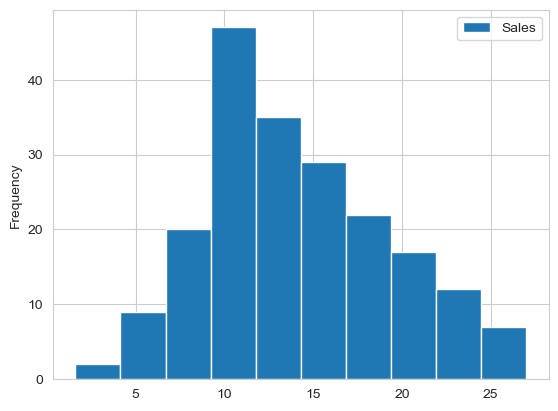

In [86]:
df[['Sales']].plot(kind = "hist", bins = 10)
plt.show()

C:\Users\elcot\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


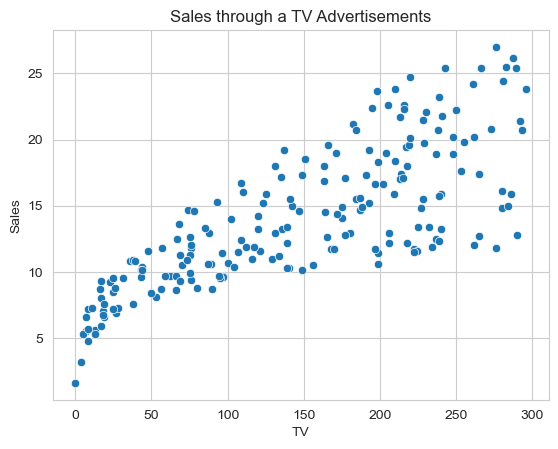

In [87]:
sns.scatterplot(df['TV'], df['Sales'])
plt.title('Sales through a TV Advertisements')
plt.show()

C:\Users\elcot\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


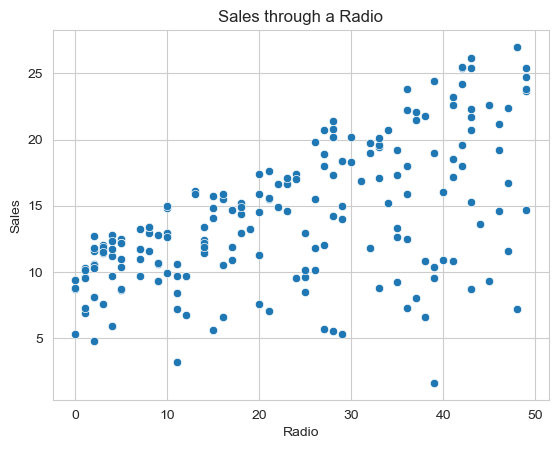

In [88]:
sns.scatterplot(df['Radio'], df['Sales'])
plt.title("Sales through a Radio")
plt.show()

C:\Users\elcot\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


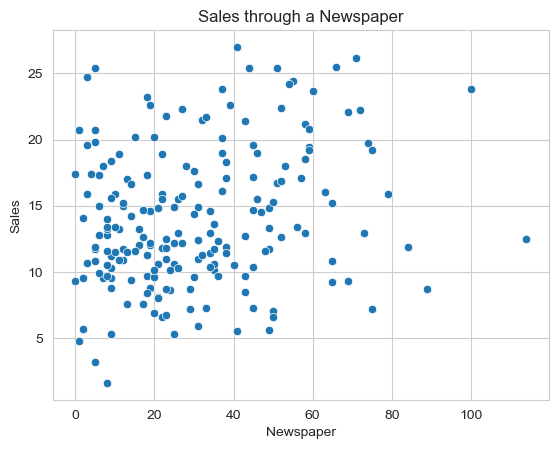

In [89]:
sns.scatterplot(df['Newspaper'], df['Sales'])
plt.title("Sales through a Newspaper")
plt.show()

In [90]:
df.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.055388   0.055569  0.782022
Radio      0.055388  1.000000   0.352552  0.577178
Newspaper  0.055569  0.352552   1.000000  0.228150
Sales      0.782022  0.577178   0.228150  1.000000

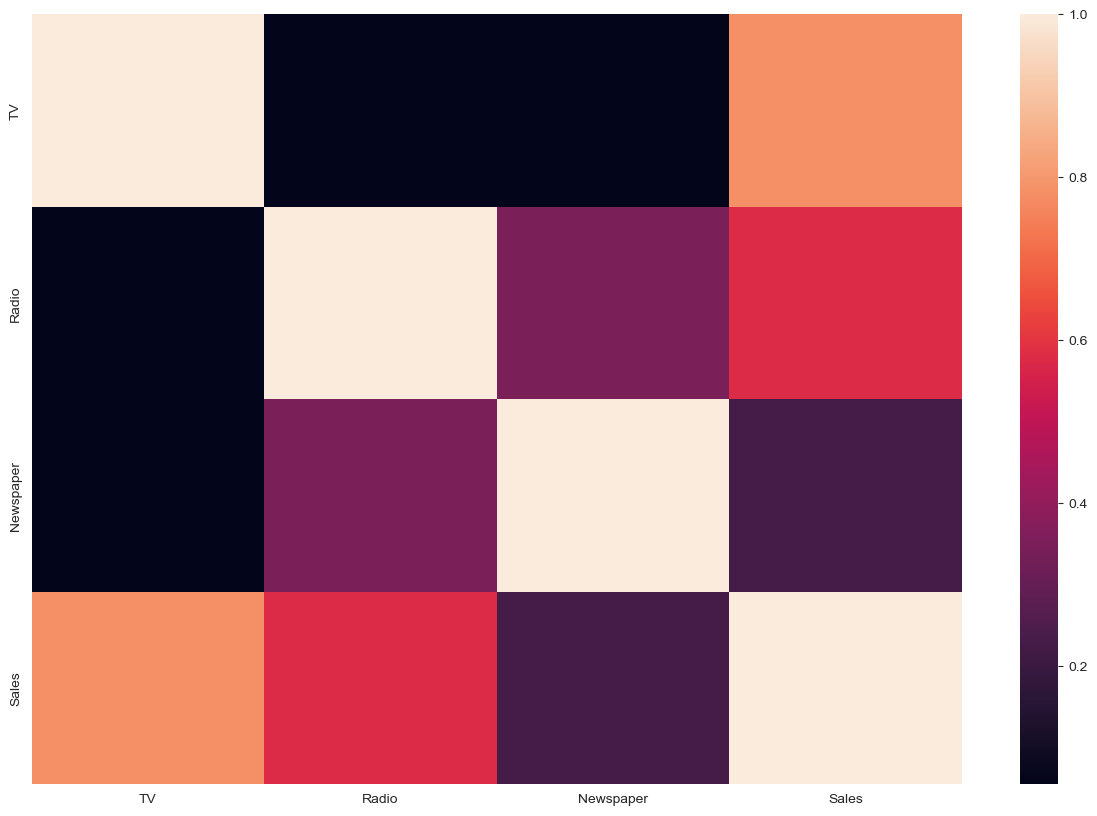

In [91]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,10))
sns.heatmap(df.corr())
plt.show()

# Preprocessing

Feature Scaling

In [92]:
X = df.iloc[:,0:3]
y = df.iloc[:,3]

In [93]:
X

TV  Radio  Newspaper
0    230     37         69
1     44     39         45
2     17     45         69
3    151     41         58
4    180     10         58
..   ...    ...        ...
195   38      3         13
196   94      4          8
197  177      9          6
198  283     42         66
199  232      8          8

[200 rows x 3 columns]

In [94]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

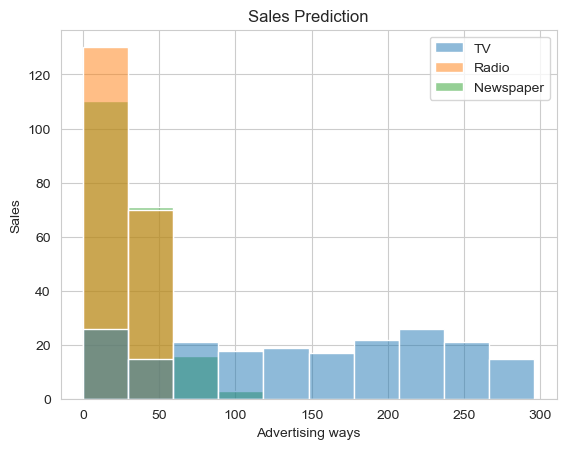

In [95]:
sns.histplot(X,bins = 10)
plt.ylabel('Sales')
plt.xlabel('Advertising ways')
plt.title("Sales Prediction")
plt.show()

Splitting

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [97]:
X.shape

(200, 3)

In [98]:
y.shape

(200,)

Model Selection

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
model = LinearRegression()

In [101]:
model.fit(X_train,y_train)

LinearRegression()

In [102]:
y_pred = model.predict(X_test)

In [103]:
y_pred

array([13.77777321, 14.61807073, 10.62664819,  9.85653672, 10.01886795,
       18.24112453, 15.16731768,  3.49594067, 20.50235979, 11.83788893,
       14.85505824, 12.76361203, 21.04298335, 14.30660938, 15.68251251,
       16.93347293, 10.10811195, 16.54689095,  9.51993456, 12.39634197,
       16.85896312, 10.13292203,  7.97031627, 13.78064928, 21.03476342,
       14.30980633,  7.05765966,  7.41805179, 15.40113718, 13.42680536,
       14.93181764, 10.01988907, 11.88845546, 16.35537927,  6.36539841,
        9.56690269, 12.99379234, 20.34843274,  8.98426024, 11.2648492 ])

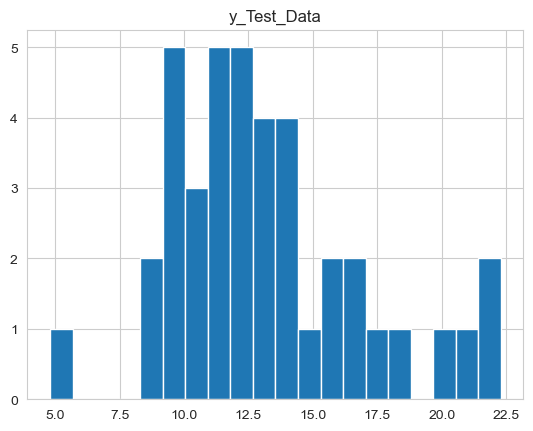

In [104]:
plt.hist(y_test, bins = 20)
plt.title("y_Test_Data")
plt.show()

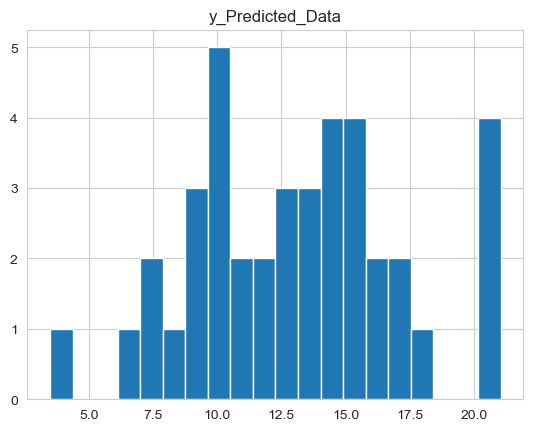

In [105]:
plt.hist(y_pred, bins = 20)
plt.title("y_Predicted_Data")
plt.show()

In [106]:
from sklearn.metrics import r2_score

In [108]:
print("Accuracy of this Model is ",r2_score(y_test,y_pred)*100,'%')

Accuracy of this Model is  84.63697187548141 %
